In [1]:
%matplotlib inline
import geopandas as gpd
import matplotlib.pyplot as pyplot
 
import sys
sys.path.insert(0, "../")
from weavingspace import WeaveUnit
from weavingspace import TileUnit
from weavingspace import Tiling

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
dem = gpd.read_file("data/dem-4vars.gpkg")
dem.columns

Index(['elevation', 'shade', 'slope', 'aspect', 'geometry'], dtype='object')

<Axes: >

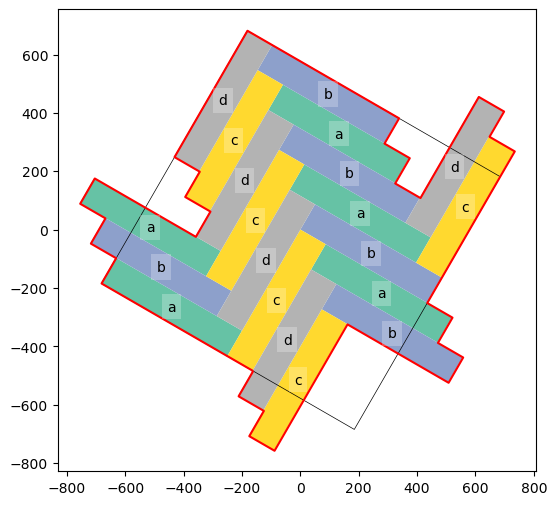

In [3]:
w1 = WeaveUnit(weave_type = "twill", n = 5, spacing = 100, aspect = 1.,
               strands = "ab|cd", crs = dem.crs).transform_rotate(60)
w1.plot(r = 0, cmap = "Set2", figsize = (18, 6))

In [4]:
weave = Tiling(w1, dem)

Initialising Tiling: 2.9583461582660675e-06
Indexing the region: 0.2551626246422529
Forming the region union: 7.859239249955863
Building the grid: 0.5727908341214061
Making the tiles: 4.202427166048437
Indexing the tiles: 0.010030167177319527


In [5]:
textile = weave.get_tiled_map(# prioritise_tiles = True, ragged_edges = True, 
                                debug = True)

STEP 1: prep data (rotation if requested): 0.036
STEP A2: overlay zones with tiling: 4.749
STEP A3: calculate areas: 0.003
STEP A4: drop columns prior to join: 0.002
STEP A5: build lookup for join: 0.032
STEP A6: perform lookup join: 0.014


In [6]:
textile.vars_to_map = ["elevation", "slope", "aspect", "shade"]
textile.colors_to_use = ["BrBG_r", "Reds", "Spectral", "Greys"]

No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.


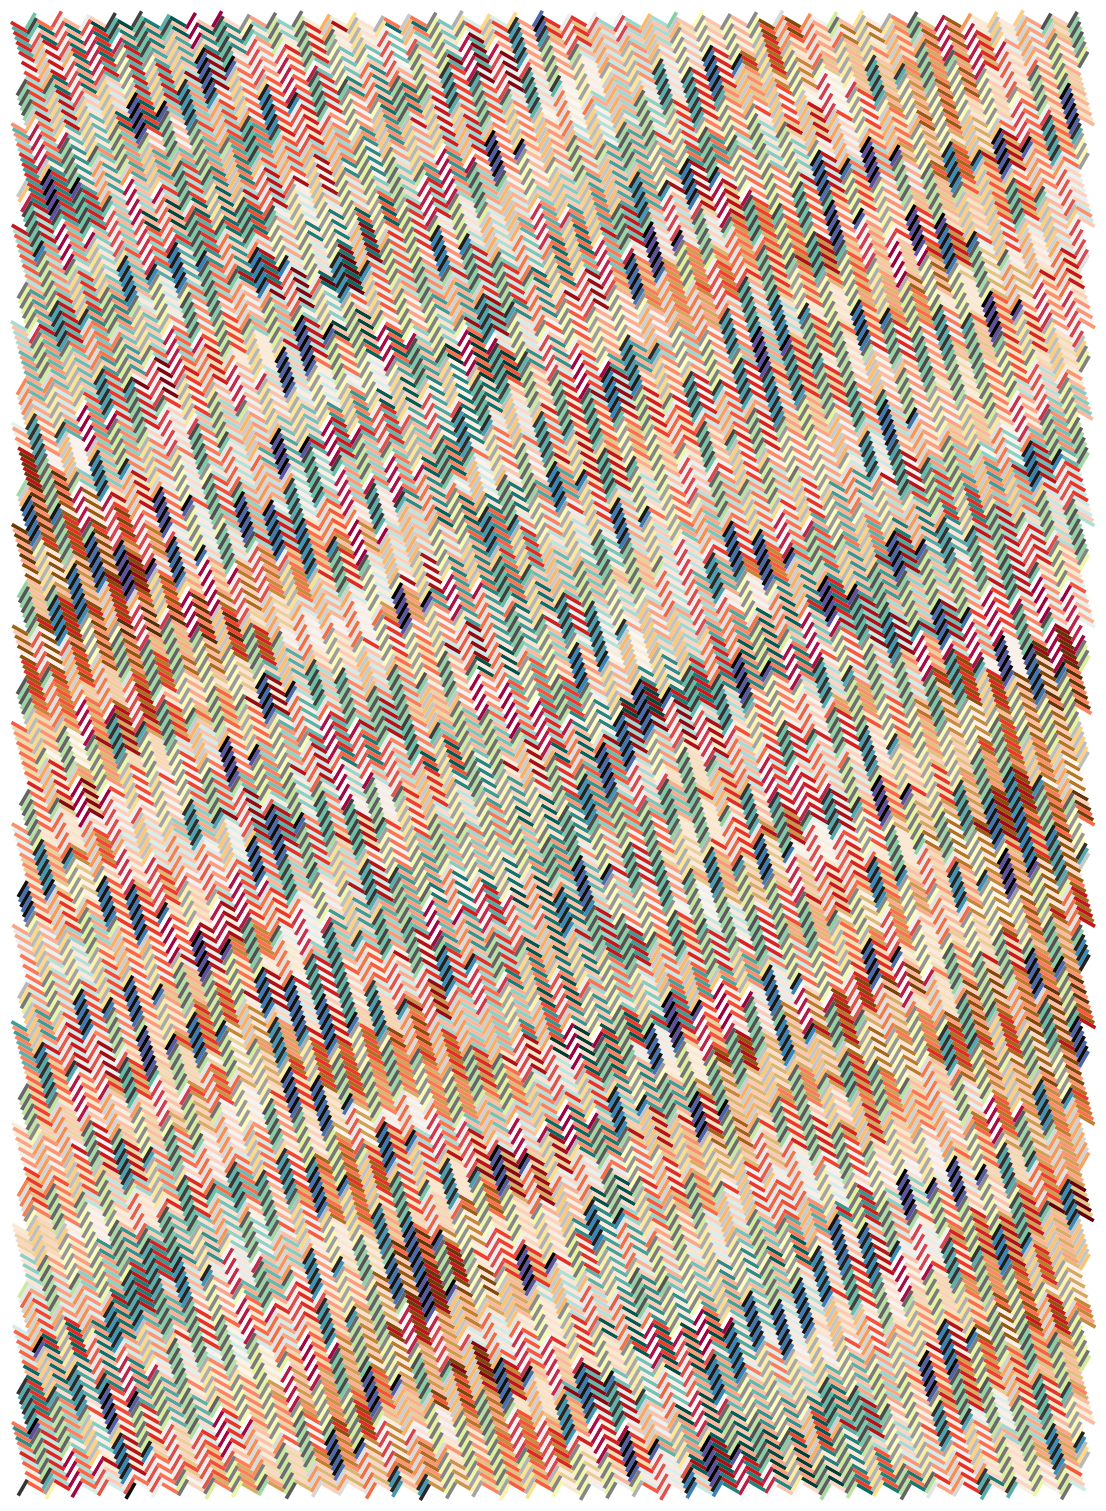

In [7]:
fig = textile.render(legend = False, linewidth = 0)

<Axes: >

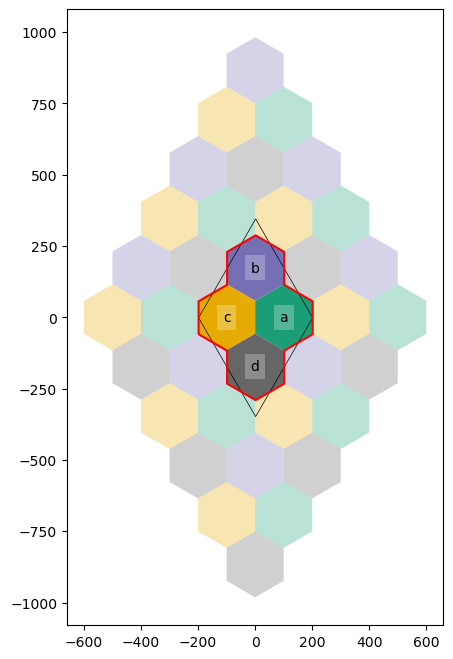

In [8]:
tile_unit = TileUnit(tiling_type = "hex-colouring", n = 4, code = "4.8.8",
                     spacing = 400, crs = dem.crs)#.transform_rotate(-45)
tile_unit.plot(r = 1)

Initialising Tiling: 1.1669471859931946e-06
Indexing the region: 0.0695164161734283
Forming the region union: 5.810446999967098
Building the grid: 1.9542768746614456
Making the tiles: 4.971258042380214
Indexing the tiles: 0.01719966670498252
STEP 1: prep data (rotation if requested): 0.030
STEP A2: overlay zones with tiling: 6.763
STEP A3: calculate areas: 0.005
STEP A4: drop columns prior to join: 0.004
STEP A5: build lookup for join: 0.376
STEP A6: perform lookup join: 0.016
No tile ids provided: setting all of them!
Setting defaults for the 'categoricals' attribute of the map.


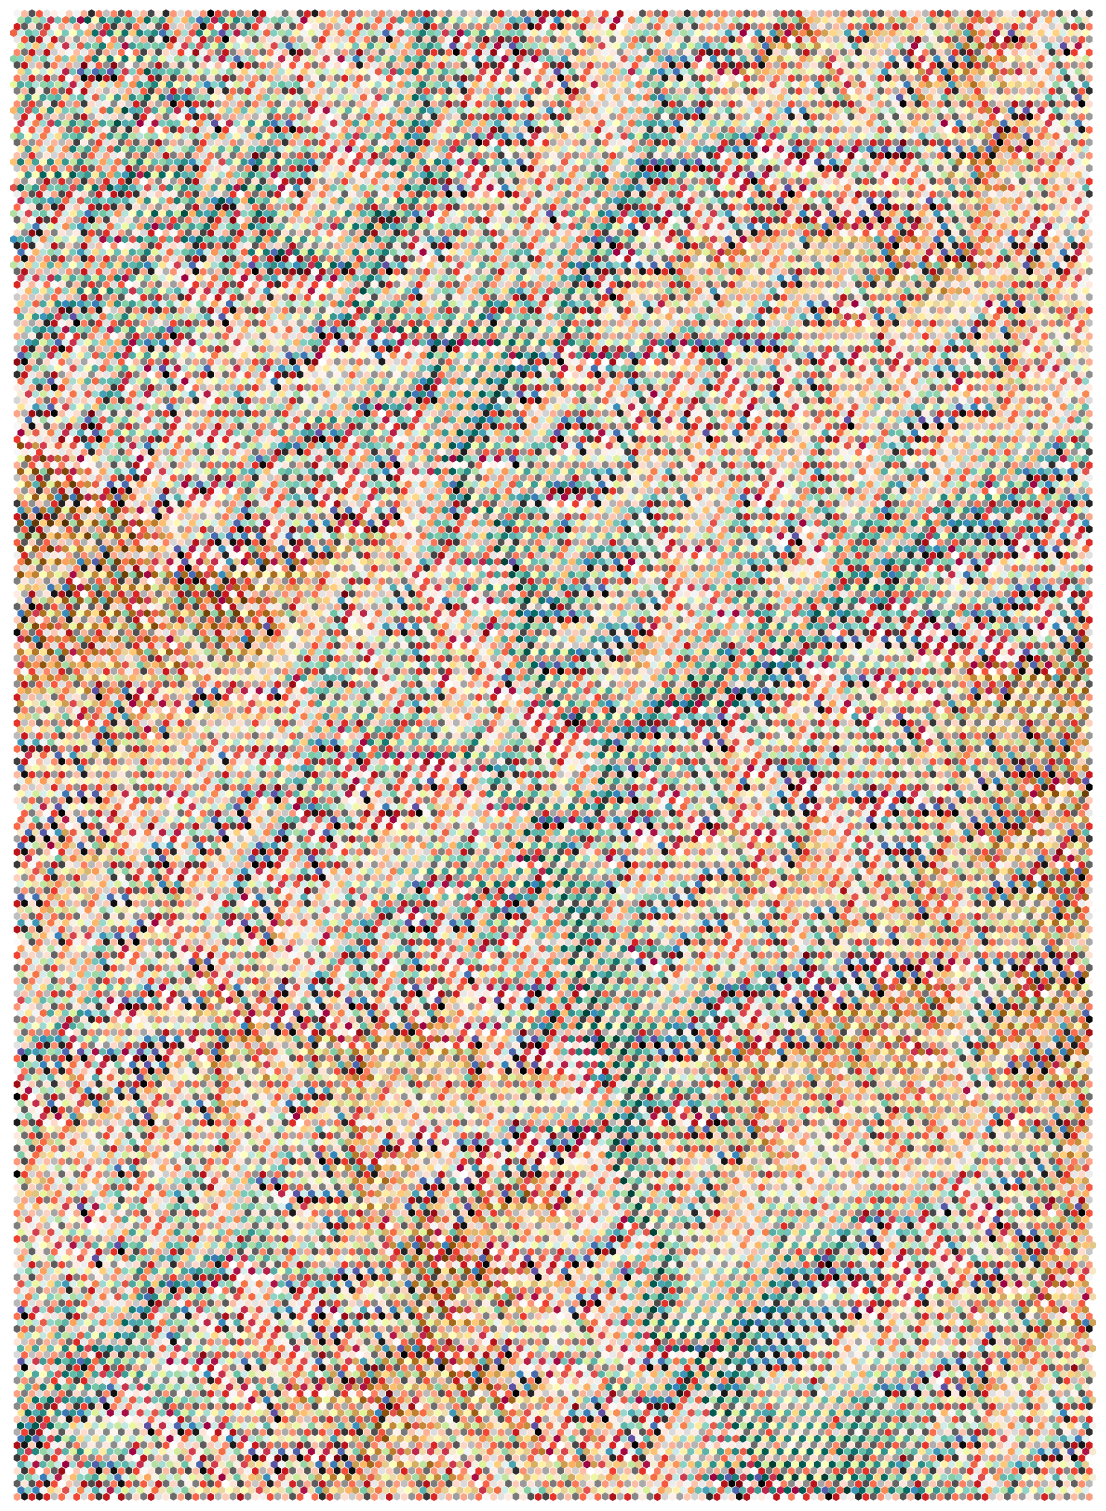

In [9]:
tiling = Tiling(tile_unit, dem, prototile_margin = 10)
t = tiling.get_tiled_map(debug = True)
t.vars_to_map = ["elevation", "slope", "aspect", "shade"]
t.colors_to_use = ["BrBG_r", "Reds", "Spectral", "Greys"]
fig = t.render(legend = False)

In [10]:
t._colourspecs

{'a': {'column': 'elevation',
  'cmap': 'BrBG_r',
  'categorical': False,
  'scheme': 'EqualInterval',
  'k': 100},
 'b': {'column': 'slope',
  'cmap': 'Reds',
  'categorical': False,
  'scheme': 'EqualInterval',
  'k': 100},
 'c': {'column': 'aspect',
  'cmap': 'Spectral',
  'categorical': False,
  'scheme': 'EqualInterval',
  'k': 100},
 'd': {'column': 'shade',
  'cmap': 'Greys',
  'categorical': False,
  'scheme': 'EqualInterval',
  'k': 100}}